<a href="https://colab.research.google.com/github/albertchen0286/-Boston-Crime-Analytics/blob/main/B7_Visualizing_Crimes_in_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Crime Analytics

<img src='https://drive.google.com/uc?id=1aY6r8os0x3t1WRle-LBbKMMZ6g2MMGEf' />

<p align="right">BA780 CohortB Team7</p>

<p align="right">Jiadai Yu, Raj Patel, Yidan Xu, Yen-Chun Chen, Zhaner Sun</p>

**Project objective**

Our goal for this project is to analyze which
areas of Boston have the highest crime rate. We also want to narrow down on specific variables, such as type of crime, district, and what day the crime occurred. With this, we can better predict possible incidents and be able to suggest appropriate reinforcements to make the city of Boston safer.

**Summary**

In this project, we used crime incident reports provided by Boston Police Department (BPD) to analyze and visualize crime in Boston.  
We found that three most common incidents in Boston are `INVESTIGATE PERSON`, `SICK ASSIST`, and `M/V - LEAVING SCENE - PROPERTY DAMAGE`. Roxbury, Downtown and South End are the top three district with the most crime reported. We also compared the crime counts between 2021 and 2022, and found that Oct. 2021 and July 2022 have most crime incidents. And the most frequent day of crime was reported in both years was Friday, while crime is also least reported between 3 A.M. and 6 A.M. Last but not least, we focused on crimes involving shooting, and found that `MURDER, NON-NEGLIGIENT MANSLAUGHTER` is the most dangerous type of crime, for 70% of reports include shooting.

**Data Source**

Crime Incident Reports (August 2015 - To Date)(Source: New System)

https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

**1. Import and Data Cleaning**  
1.1 Import and Discription   
1.2 Data Cleaning  
**2. Aggregation and Visualization**    
2.1 Most Frequent Type of Incidents  
2.2 District Differences of Incidents             
2.3 Month with the Highest Rate of Crime  
2.4 Day and Time with Most Reports  
2.5 Most Dangerous Incidents: Shooting  
**3. Conclusion** 

**4. Citation**

## 1. Import and Data Cleaning  
### 1.1 Import and Discription

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime2021 = pd.read_csv('https://raw.githubusercontent.com/JiadaiY/JiadaiYu/main/BA780%20GroupProject/Crime%20Incident%20Reports%20-%202021.csv')
crime2022 = pd.read_csv('https://raw.githubusercontent.com/JiadaiY/JiadaiYu/main/BA780%20GroupProject/Crime%20Incident%20Reports%20-%202022.csv')

crime2021.describe()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,OFFENSE_CODE,OFFENSE_CODE_GROUP,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long
count,71721.000000,0.0,71721.000000,71721.0,71721.000000,71721.000000,0.0,71721.000000,71721.000000
mean,2431.022378,NaN,0.012674,2021.0,6.689700,12.802415,NaN,40.617378,-68.219186
std,1183.728509,NaN,0.111864,0.0,3.338571,6.366089,NaN,8.322904,13.978722
min,111.000000,NaN,0.000000,2021.0,1.000000,0.000000,NaN,0.000000,-71.178674
25%,1106.000000,NaN,0.000000,2021.0,4.000000,9.000000,NaN,42.294173,-71.096444
50%,3005.000000,NaN,0.000000,2021.0,7.000000,14.000000,NaN,42.325794,-71.075864
75%,3207.000000,NaN,0.000000,2021.0,10.000000,18.000000,NaN,42.348406,-71.059709
max,3831.000000,NaN,1.000000,2021.0,12.000000,23.000000,NaN,42.395042,0.000000


### 1.2 Data Cleaning 

In [ ]:
crime2021.isna().sum()
crime2022.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     67496
OFFENSE_DESCRIPTION        0
DISTRICT                 159
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               67496
STREET                     1
Lat                        0
Long                       0
Location                   0
dtype: int64

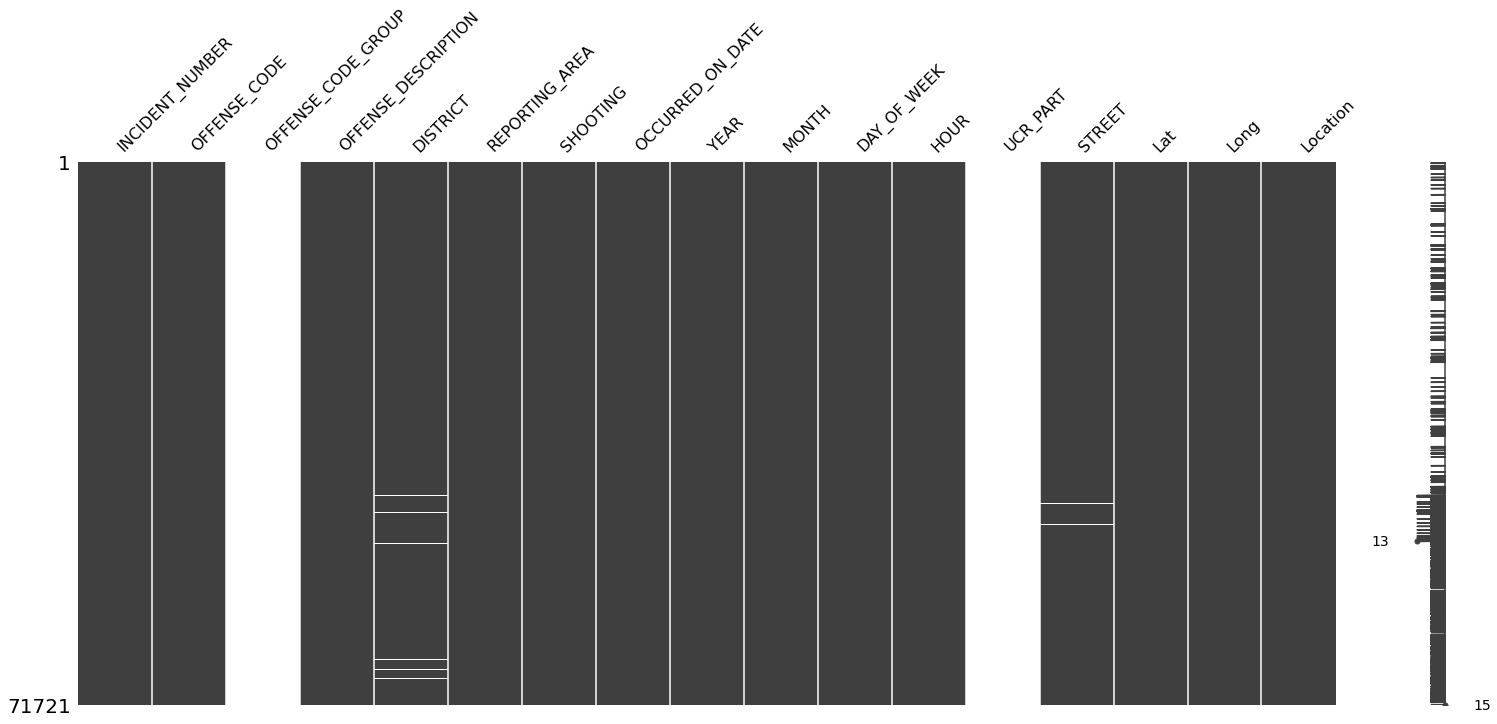

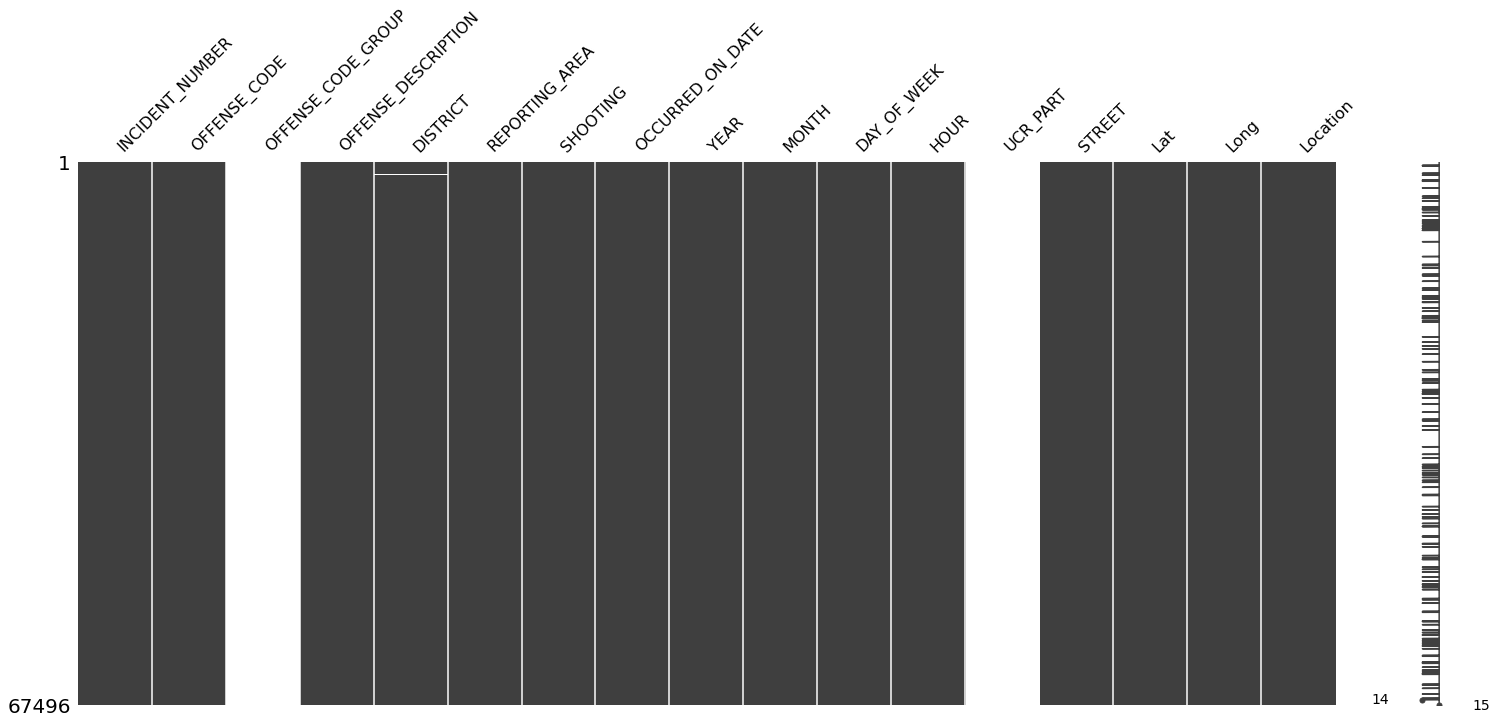

In [ ]:
import missingno as msno
msno.matrix(crime2021)
msno.matrix(crime2022)

<p>Steps for data cleaning:

1.   Drop column 'OFFENSE_CODE_GROUP' and 'UCR_PART' since these are null columns.
2.   Change offense_code fields name into crime_type.
3. Add new column district name that corresponds to district code (https://bpdnews.com/districts).
4. Dropping all null rows (from 'DISTRICT', 'DISTRICT_NAME', and 'STREET') which lost about 2.5% of the whole dataset
5. Dropping rows from column 'Lat', 'Long', and 'Location' with value 0 which lost about 3.0% of the whole dataset
</p>

In [ ]:
crime2021 = pd.DataFrame(crime2021)
crime2021_tidy = crime2021.copy()
crime2021_tidy.drop(['OFFENSE_CODE_GROUP', 'UCR_PART'], axis=1, inplace=True)
crime2021_tidy.rename(columns = {'OFFENSE_CODE': 'CRIME_TYPE'}, inplace=True)

DISTRICT_NAME = {'A1':'Downtown_&_Charlestown', 'A15':'Downtown_&_Charlestown', 'A7':'East_Boston', 'B2':'Roxbury', 'B3':'Mattapan', 'C6':'South_Boston', 'C11':'Dorchester', 'D4':'South_End', 'D14':'Brighton', 'E5':'West_Roxbury', 'E13':'Jamaica_Plain', 'E18':'Hyde_Park'}
crime2021_tidy['DISTRICT_NAME'] = crime2021_tidy['DISTRICT'].map(DISTRICT_NAME)
crime2021_tidy.dropna(subset=['DISTRICT', 'DISTRICT_NAME', 'STREET'], inplace=True)
crime2021_tidy = crime2021_tidy[(crime2021_tidy.Lat != 0.000000) & (crime2021_tidy.Long != 0.000000) & (crime2021_tidy.Location != (0, 0))]

crime2021_tidy = pd.DataFrame(crime2021_tidy, columns=['INCIDENT_NUMBER', 'CRIME_TYPE', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'DISTRICT_NAME', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long', 'Location'])
crime2021_tidy.head()

,INCIDENT_NUMBER,CRIME_TYPE,OFFENSE_DESCRIPTION,DISTRICT,DISTRICT_NAME,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,PLTEST005,520,BURGLARY - RESIDENTIAL,B2,Roxbury,289,1,2021-10-13 00:00:00,2021,10,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
1,PLTEST003,3114,INVESTIGATE PROPERTY,B2,Roxbury,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
2,PLTEST002,3114,INVESTIGATE PROPERTY,B2,Roxbury,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
4,312030979,3201,PROPERTY - LOST/ MISSING,E13,Jamaica_Plain,465,0,2021-03-22 00:00:00,2021,3,Monday,0,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
5,292152228,3301,VERBAL DISPUTE,C11,Dorchester,347,0,2021-07-28 20:45:00,2021,7,Wednesday,20,LYON ST,42.306383,-71.060212,"(42.30638322801941, -71.06021217719662)"


In [ ]:
crime2022 = pd.DataFrame(crime2022)
crime2022_tidy = crime2022.copy()
crime2022_tidy.drop(['OFFENSE_CODE_GROUP', 'UCR_PART'], axis=1, inplace=True)
crime2022_tidy.rename(columns = {'OFFENSE_CODE': 'CRIME_TYPE'}, inplace=True)

DISTRICT_NAME = {'A1':'Downtown_&_Charlestown', 'A15':'Downtown_&_Charlestown', 'A7':'East_Boston', 'B2':'Roxbury', 'B3':'Mattapan', 'C6':'South_Boston', 'C11':'Dorchester', 'D4':'South_End', 'D14':'Brighton', 'E5':'West_Roxbury', 'E13':'Jamaica_Plain', 'E18':'Hyde_Park'}
crime2022_tidy['DISTRICT_NAME'] = crime2022_tidy['DISTRICT'].map(DISTRICT_NAME)
crime2022_tidy.dropna(subset=['DISTRICT', 'DISTRICT_NAME'], inplace=True)
crime2022_tidy = crime2022_tidy[(crime2022_tidy.Lat != 0.000000) & (crime2022_tidy.Long != 0.000000) & (crime2022_tidy.Location != (0, 0))]

crime2022_tidy = pd.DataFrame(crime2022_tidy, columns=['INCIDENT_NUMBER', 'CRIME_TYPE', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'DISTRICT_NAME', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long', 'Location'])
crime2022_tidy.head()

,INCIDENT_NUMBER,CRIME_TYPE,OFFENSE_DESCRIPTION,DISTRICT,DISTRICT_NAME,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,225520077,3115,INVESTIGATE PERSON,D14,Brighton,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)"
2,223260108,3115,INVESTIGATE PERSON,D4,South_End,154,0,2022-11-22 09:35:00,2022,11,Tuesday,9,COLUMBUS AVE,42.342899,-71.078800,"(42.342898500827786, -71.07880000122785)"
3,222934485,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,Roxbury,319,0,2022-05-14 20:50:00,2022,5,Saturday,20,BLUE HILL AVE,42.308038,-71.083592,"(42.30803768051951, -71.08359213073199)"
4,222924960,3301,VERBAL DISPUTE,C11,Dorchester,355,0,2022-04-09 16:30:00,2022,4,Saturday,16,GIBSON ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
5,222901734,3802,M/V ACCIDENT - PROPERTY DAMAGE,C11,Dorchester,351,0,2022-11-27 00:00:00,2022,11,Sunday,0,DORCHESTER AVE & LINCOLN ST\nDORCHESTER MA 02...,42.299776,-71.060298,"(42.299775974160525, -71.06029800221413)"


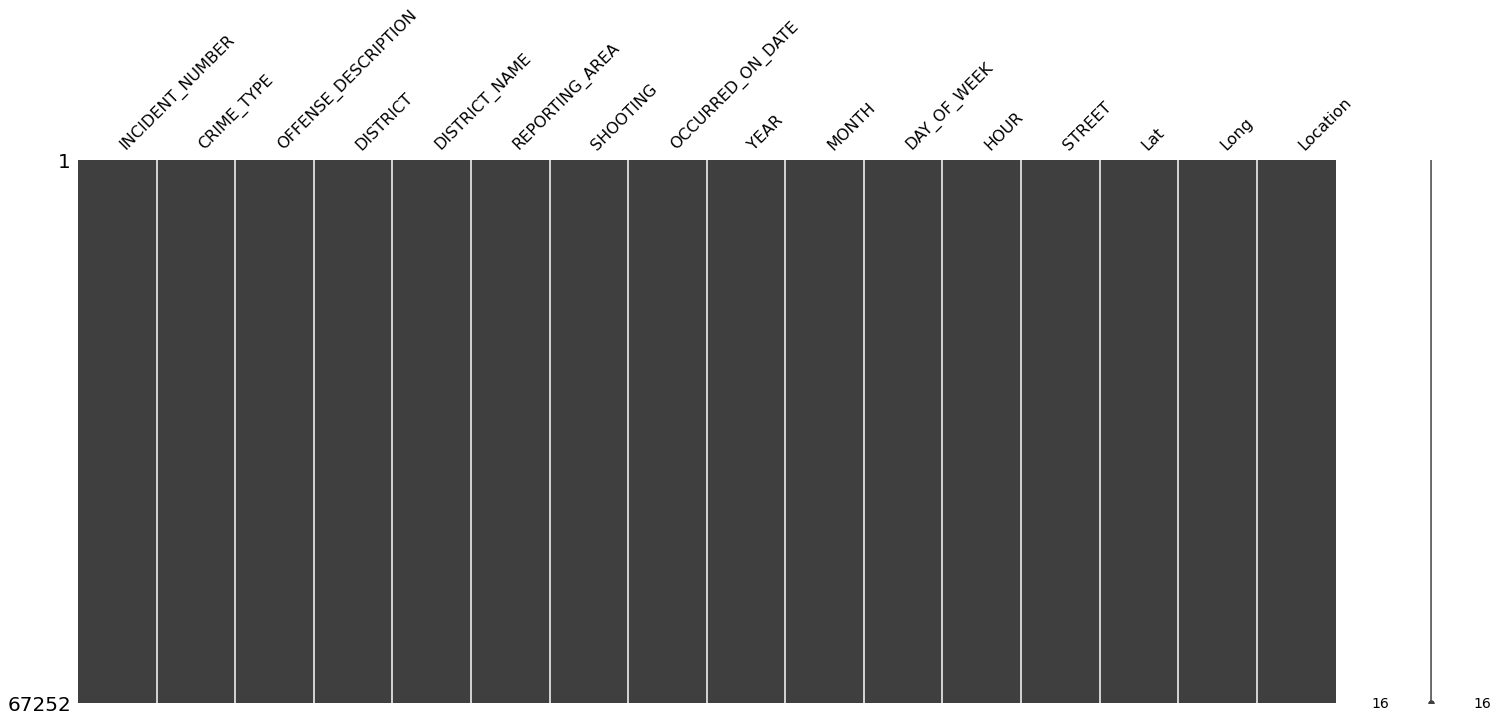

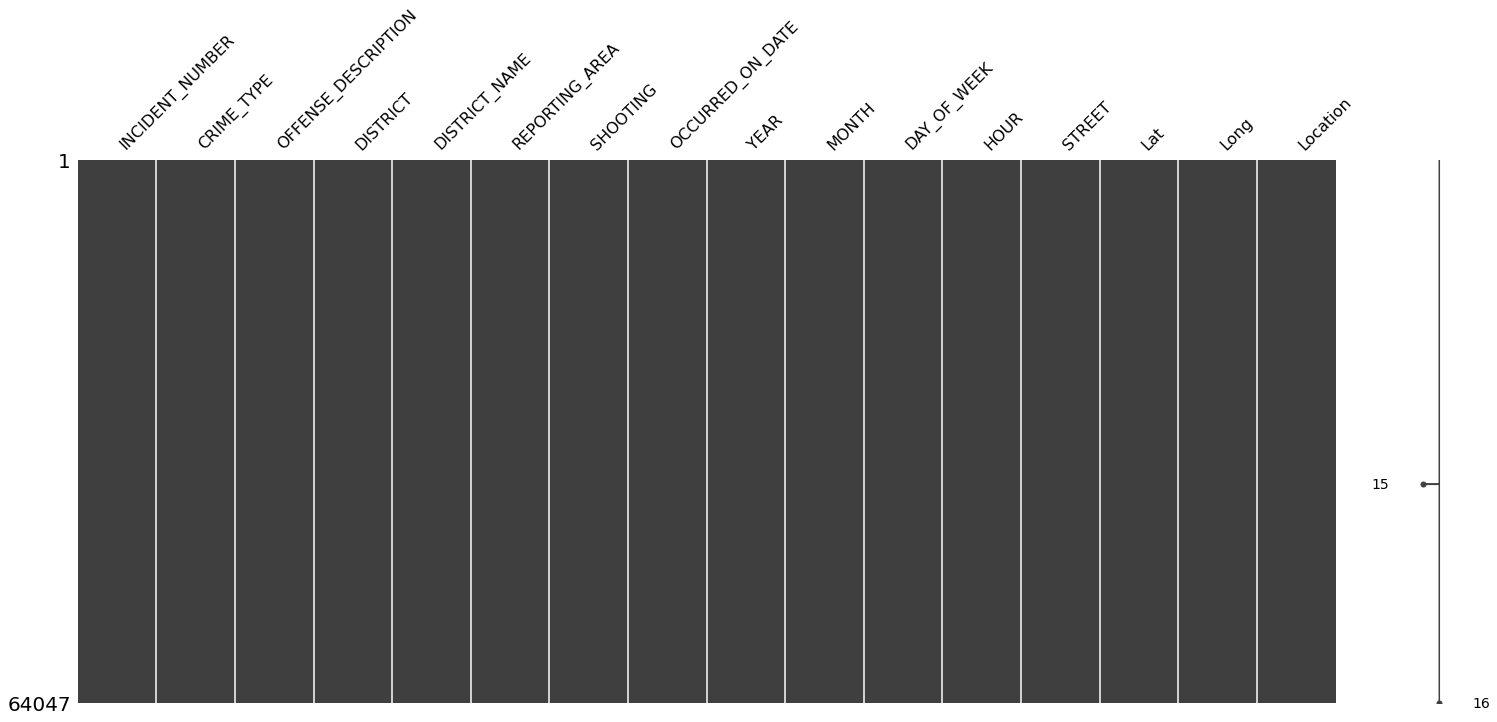

In [ ]:
msno.matrix(crime2021_tidy)
msno.matrix(crime2022_tidy)

1. `INCIDENT_NUMBER`: Identical number for each crime attempted (ID)
1. `CRIME_TYPE`: Codes represented by each type of crime
1. `OFFENSE_DESCRIPTION`: Offense action describe in words
1. `DISTRICT`: District codes of the crime incident
1. `DISTRICT_NAME`: District name of the crime incident
1. `REPORTING_AREA`: Area that was reported for crime incident
1. `SHOOTING`: '1' for shooting incident and '0' for negative
1. `OCCURRED_ON_DATE`: Date and Time for crime incident occurred
1. `YEAR`: Year of the crime incident happened
1. `MONTH`: Month of the crime incident happened
1. `DAY_OF_WEEK`: Day of week of the crime incident happened
1. `HOUR`: The hour of the day that crime incident happened
1. `STREET`: Street name of the crime incident happened
1. `Lat`: Latitude of the crime incident happened
1. `Long`: Longitude of the crime incident happened
1. `Location`: Location of the crime incident happened

In [ ]:
crime_total_2021 = crime2021_tidy['INCIDENT_NUMBER'].unique().size
print('This dataset includes ',crime_total_2021,' incidents in 2021.')
crime_total_2022 = crime2022_tidy['INCIDENT_NUMBER'].unique().size
print('This dataset includes ',crime_total_2022,' incidents in 2022, up to ',crime2022_tidy['OCCURRED_ON_DATE'].max())

This dataset includes  67252  incidents in 2021.
This dataset includes  64047  incidents in 2022, up to  2022-11-30 02:26:00


## 2. Aggregation and Visualization  
### 2.1 Most Frequent Type of Incidents  
In this part, we will analyze, which type of incidents occur most in number, and which type of incidents involve the most shootings.  
First, let's take a closer look at the two variables that contains the information of incident types: `CRIME_TYPE` and `OFFENSE_DESCRIPTION`.

In [ ]:
print('There are ', crime2021_tidy['CRIME_TYPE'].unique().size,' unique types of crime,')
print('and ',crime2021_tidy['OFFENSE_DESCRIPTION'].unique().size,' unique detailed descriptions of crime.')

There are  119  unique types of crime,
and  119  unique detailed descriptions of crime.


There is an one-to-one relationship between crime type number and offense description, these two variables are alias to each other. In the following analysis, we will use only `OFFENSE_DESCRIPTION`, for better conciseness and readability.

In [ ]:
crime_by_type_2021 = crime2021_tidy.groupby('OFFENSE_DESCRIPTION').count()
crime_by_type_2021 = crime_by_type_2021[['INCIDENT_NUMBER']]
crime_by_type_2021 = crime_by_type_2021.rename(columns={"INCIDENT_NUMBER": "INCIDENT_NUMBER_2021"})

crime_by_type_2022 = crime2022_tidy.groupby('OFFENSE_DESCRIPTION').count()
crime_by_type_2022 = crime_by_type_2022[['INCIDENT_NUMBER']]
crime_by_type_2022 = crime_by_type_2022.rename(columns={"INCIDENT_NUMBER": "INCIDENT_NUMBER_2022"})


crime_by_type_2021_2022 = pd.concat([crime_by_type_2021,crime_by_type_2022], axis=1, join="inner")
crime_by_type_2021_2022 = crime_by_type_2021_2022.sort_values(by='INCIDENT_NUMBER_2022', ascending=False).head(10)
crime_by_type_2021_2022

,INCIDENT_NUMBER_2021,INCIDENT_NUMBER_2022
OFFENSE_DESCRIPTION,,
INVESTIGATE PERSON,6520,6979
SICK ASSIST,4770,4861
M/V - LEAVING SCENE - PROPERTY DAMAGE,4362,3937
INVESTIGATE PROPERTY,3360,3093
TOWED MOTOR VEHICLE,3062,2832
VANDALISM,3130,2599
ASSAULT - SIMPLE,2601,2596
LARCENY SHOPLIFTING,2212,1978
PROPERTY - LOST/ MISSING,1646,1963


<ipython-input-10-23e02ed2a694>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


[Text(0, 0.5, 'Incident Number')]

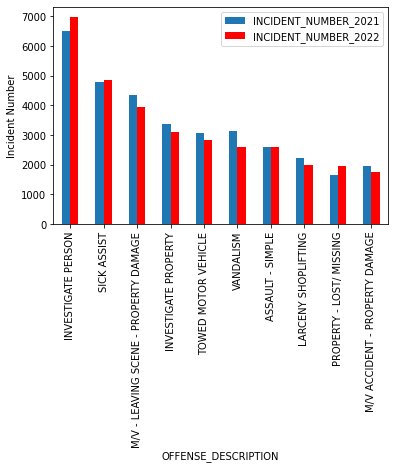

In [ ]:
crime_by_type_2021_2022.plot.bar(y = ["INCIDENT_NUMBER_2021","INCIDENT_NUMBER_2022"],color=["#1f77b4","#ff0000"])

ax=plt.axes()
ax.set(ylabel='Incident Number')

The top ten frequent types of crime in 2021 and 2022 are almost the same, with only one difference, and the patterns are quite similar, Notably, since our data are only included through November 2022, most incidents have a higher number of occurrences in 2021.

### 2.2 District Differences of Incidents 

In [ ]:
crime_by_district_2021 = crime2021_tidy.groupby(["DISTRICT","DISTRICT_NAME"]).count()
crime_by_district_2021 = crime_by_district_2021[['INCIDENT_NUMBER']]
crime_by_district_2021 = crime_by_district_2021.rename(columns={"INCIDENT_NUMBER": "INCIDENT_NUMBER_2021"})

crime_by_district_2022 = crime2022_tidy.groupby(["DISTRICT","DISTRICT_NAME"]).count()
crime_by_district_2022 = crime_by_district_2022[['INCIDENT_NUMBER']]
crime_by_district_2022 = crime_by_district_2022.rename(columns={"INCIDENT_NUMBER": "INCIDENT_NUMBER_2022"})

crime_by_district_2021_2022 = pd.concat([crime_by_district_2021,crime_by_district_2022], axis=1, join="inner")
crime_by_district_2021_2022 = crime_by_district_2021_2022.sort_values(by='INCIDENT_NUMBER_2021', ascending=False).head(10)
crime_by_district_2021_2022.sort_values(by="INCIDENT_NUMBER_2021", ascending=False)

,,INCIDENT_NUMBER_2021,INCIDENT_NUMBER_2022
DISTRICT,DISTRICT_NAME,,
B2,Roxbury,9571,8903
D4,South_End,8926,8500
C11,Dorchester,8867,8146
A1,Downtown_&_Charlestown,7249,6533
B3,Mattapan,7058,6327
C6,South_Boston,5431,5151
D14,Brighton,4853,5076
E18,Hyde_Park,3859,3711
E13,Jamaica_Plain,3684,3869


There are 12 districts in Boston, each has a unique code `DISTRICT` and `DISTRICT_NAME`.  
Roxbury, South End and Dorchester are the top three district with the highest crime rate.

<ipython-input-12-c39bd198b5f0>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


[Text(0, 0.5, 'Incident Number'),
 Text(0.5, 0, 'District Name'),
 Text(0.5, 1.0, 'Top Ten Districts with the Most Crime Reported')]

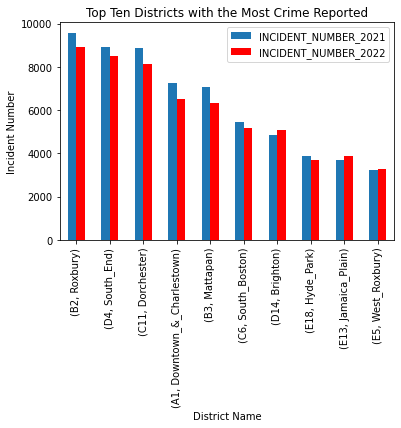

In [ ]:
crime_by_district_2021_2022.plot.bar(y=["INCIDENT_NUMBER_2021","INCIDENT_NUMBER_2022"],color=["#1f77b4","#ff0000"])
ax=plt.axes()
ax.set(xlabel='District Name',ylabel='Incident Number', title='Top Ten Districts with the Most Crime Reported')

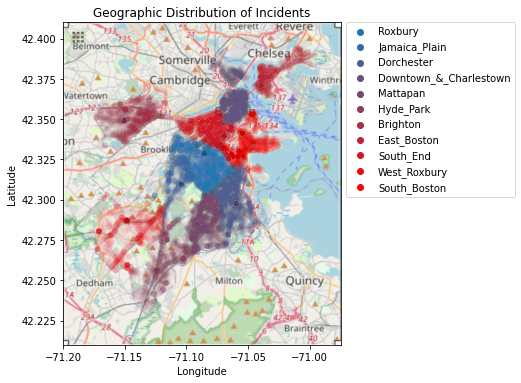

In [ ]:
import matplotlib.image as mpimg 
map_img = mpimg.imread('https://github.com/JiadaiY/JiadaiYu/blob/main/BA780%20GroupProject/Boston%20map.png?raw=true') 

fig = plt.figure()
fig.set_size_inches(4.97,5.93)
g = sns.scatterplot(data=crime2021_tidy,x='Long',y='Lat',hue='DISTRICT_NAME',alpha=0.02,palette="blend:#1f77b4,#ff0000")
g.set_title('Geographic Distribution of Incidents')
g.set(xlabel="Longitude",ylabel="Latitude",xlim=(-71.20,-70.975),ylim=(42.21,42.41))
g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.imshow(map_img,
         aspect = g.get_aspect(),
         extent = g.get_xlim() + g.get_ylim(),
          zorder = 0)
plt.show()

### 2.3 Month with the Highest Crime Rate
Rank the number of crimes by month and select the top three months with the highest number of incidents.

In [ ]:
crime_by_month = crime2021_tidy.groupby('MONTH').count().reset_index()[['MONTH','INCIDENT_NUMBER']]
crime_by_month.sort_values(by="INCIDENT_NUMBER", ascending=False).head(3)

,MONTH,INCIDENT_NUMBER
9,10,6445
7,8,6411
8,9,6184


List the top ten incidents with the highest number of reports in the first three months

<ipython-input-15-508afeca767a>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


[Text(0, 0.5, 'NUmber of Reports'),
 Text(0.5, 0, 'Top Ten Incidents'),
 Text(0.5, 1.0, 'Top three month with most incidents of 2021')]

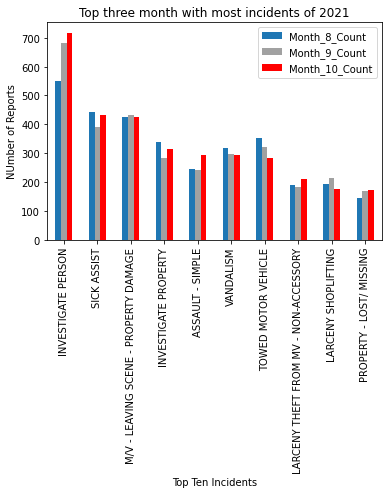

In [ ]:
# groupby two variables
month10 = crime2021_tidy[crime2021_tidy.MONTH==10]
month10 = month10.groupby('OFFENSE_DESCRIPTION').count()
month10 = month10.rename(columns={"INCIDENT_NUMBER": "Month_10_Count"})

month8 = crime2021_tidy[crime2021_tidy.MONTH==8]
month8 = month8.groupby('OFFENSE_DESCRIPTION').count()
month8 = month8.rename(columns={"INCIDENT_NUMBER": "Month_8_Count"})

month9 = crime2021_tidy[crime2021_tidy.MONTH==9]
month9 = month9.groupby('OFFENSE_DESCRIPTION').count()
month9 = month9.rename(columns={"INCIDENT_NUMBER": "Month_9_Count"})


result = pd.concat([month8, month9, month10], axis=1, join="inner")
result = result.sort_values(by='Month_10_Count', ascending=False).head(10)
result.plot.bar(y = {"Month_8_Count","Month_9_Count","Month_10_Count"},color=["#1f77b4","#a1a1a1","#ff0000"])

ax=plt.axes()
ax.set(xlabel='Top Ten Incidents',ylabel='NUmber of Reports', title='Top three month with most incidents of 2021')

Find high frequency reported incidents for all districts in October

In [ ]:
top_3_crimes_lst = crime_by_type_2021.sort_values(by=['INCIDENT_NUMBER'], ascending=False)[:3]['OFFENSE_DESCRIPTION'].values

crime_by_type_month = crime2021_tidy.groupby(['OFFENSE_DESCRIPTION','MONTH','DISTRICT']).agg({'INCIDENT_NUMBER':'count'}).reset_index()
crime_by_top_type_month = crime_by_type_month[crime_by_type_month['OFFENSE_DESCRIPTION'].isin(top_3_crimes_lst)]
crime_by_top_type_month.sort_values(by="INCIDENT_NUMBER", ascending=False).head()

KeyError: ignored

In [ ]:
crime_by_top_type_month10 = crime_by_top_type_month[crime_by_type_month['MONTH']==10]

days_sumy = sns.catplot(x='DISTRICT', y='INCIDENT_NUMBER', data=crime_by_top_type_month10, kind='bar', hue='OFFENSE_DESCRIPTION',palette=["#1f77b4","#a1a1a1","#ff0000"])
plt.title('OCT.Number of Reported Cases by District')
plt.ylabel('INCIDENT')
plt.show()

Phase Summary: In 2021, the highest incident months were October, August, and September. The most reported incidents include investigate person, sick assist, and property damage. From the high-incidence district in October, investigate persons occurred in B2, B3, C11, and D4; A1, B2, C11, and D4 are the high-incidence areas for sick assist; B2, and C11 are the high-incidence areas for property damage. Generally speaking, B2, B3, C11, and D4 are the regions with the most cases reported throughout October.

In [ ]:
# repeat the analysis in 2022
crime_by_month = crime2022_tidy.groupby('MONTH').count().reset_index()[['MONTH','INCIDENT_NUMBER']]
crime_by_month.sort_values(by="INCIDENT_NUMBER", ascending=False).head(3)

In [ ]:
top_3_crimes_lst = crime_by_type_2022.sort_values(by=['INCIDENT_NUMBER'], ascending=False)[:3]['OFFENSE_DESCRIPTION'].values

crime_by_type_month = crime2022_tidy.groupby(['OFFENSE_DESCRIPTION','MONTH','DISTRICT']).agg({'INCIDENT_NUMBER':'count'}).reset_index()
crime_by_top_type_month = crime_by_type_month[crime_by_type_month['OFFENSE_DESCRIPTION'].isin(top_3_crimes_lst)]
crime_by_top_type_month.sort_values(by="INCIDENT_NUMBER", ascending=False).head()

In [ ]:
crime_by_top_type_month7 = crime_by_top_type_month[crime_by_type_month['MONTH']==7]

days_sumy = sns.catplot(x='DISTRICT', y='INCIDENT_NUMBER', data=crime_by_top_type_month7, kind='bar', hue='OFFENSE_DESCRIPTION', palette=["#1f77b4","#a1a1a1","#ff0000"])
plt.title('JUL.Number of Reported Cases by District')
plt.ylabel('INCIDENT')
plt.show()

By comparing the types of incidents and the number of incidents reported in 2021 and 2022, it is clear that most of the cases occurred from July to October in one year, and the main types of reported cases include investigation person, sick assist, and property damage. Districts B2, B3, D4, and C11 are the high-frequency areas for incident reporting.

### 2.4 Day and Time with Most Reports

In [ ]:
crime2021_tidy["DAY_OF_WEEK"].unique()

In [ ]:
crime_by_days_2021 = crime2021_tidy.groupby(["DAY_OF_WEEK"]).agg({'INCIDENT_NUMBER':'count'}).reset_index()
crime_by_days_2021.astype({'INCIDENT_NUMBER': 'int64'}).dtypes
crime_by_days_2021

In [ ]:
crime_by_days_2021 = crime2021_tidy["DAY_OF_WEEK"].value_counts()
crime_by_days_2021

Friday       10289
Wednesday     9816
Monday        9698
Thursday      9662
Saturday      9613
Tuesday       9472
Sunday        8702
Name: DAY_OF_WEEK, dtype: int64

What day is crime most and least reported? It seems to be that on Fridays is when crime is most reported, while Sundays are when they are least reported. 

In [ ]:
crime_by_days_2022 = crime2022_tidy.groupby(["DAY_OF_WEEK"]).agg({'INCIDENT_NUMBER':'count'}).reset_index()
crime_by_days_2022.astype({'INCIDENT_NUMBER': 'int64'}).dtypes
crime_by_days_2022

In [ ]:
crime_by_days_2022 = crime2022_tidy["DAY_OF_WEEK"].value_counts()
crime_by_days_2022

Friday       9714
Monday       9385
Thursday     9306
Wednesday    9304
Saturday     9190
Tuesday      9110
Sunday       8038
Name: DAY_OF_WEEK, dtype: int64

The most common day crime was reported in 2022 was Friday, which was the same as 2021. However, the second most common day that crime was reported was in 2022 was Monday, while in 2021 it was Wednesday. Saturday, Tuesday, and Sunday all finished last in both years.

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_by_days_2021_chart = sns.catplot(x='DAY_OF_WEEK', y='INCIDENT_NUMBER', data=crime_by_days_2021, kind='bar', order=day_order, palette="blend:#1f77b4,#ff0000").set(title='Number of Incidents for 2021')
plt.xticks(rotation=45)
plt.show()

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_by_days_2022_chart = sns.catplot(x='DAY_OF_WEEK', y='INCIDENT_NUMBER', data=crime_by_days_2022, kind='bar', order=day_order, palette="blend:#1f77b4,#ff0000").set(title='Number of Incidents for 2022')
plt.xticks(rotation=45)

Surprisingly, most of the days that the crimes are reported are fairly close to each other. For example, Wednesday, Monday, Thursday, Saturday, and Tuesday only vary by 300 reports the whole year.  
In this anlysis, we focsued on the top three most common crimes and wanted to see which days reported these crimes the most. From 2.1, we found that the top 3 frequent types of incidents are: `INVESTIGATE PERSON`, `SICK ASSIST`, and `M/V - LEAVING SCENE - PROPERTY DAMAGE`. So let's break it down by each day of the week to see which type of crime is most common in those days. 

In [ ]:
top_3_crimes_lst = crime_by_type_2021.sort_values(by=['INCIDENT_NUMBER'], ascending=False)[:3]['OFFENSE_DESCRIPTION'].values
top_3_crimes=crime2021_tidy[crime2021_tidy.OFFENSE_DESCRIPTION.isin(top_3_crimes_lst)]
top_3_crime_by_days=top_3_crimes.groupby(['OFFENSE_DESCRIPTION',"DAY_OF_WEEK"]).agg({'INCIDENT_NUMBER':'count'}).reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_sumy = sns.catplot(x="DAY_OF_WEEK", y='INCIDENT_NUMBER', data=top_3_crime_by_days, kind='bar', order=day_order, 
                        col='OFFENSE_DESCRIPTION', col_order=top_3_crimes_lst, palette="blend:#1f77b4,#ff0000")
plt.show()

KeyError: ignored

The graph shows that `INVESTIGATE PERSON` is most common on Wednesday, while `SICK ASSIST` is most common on Thrusday, and `M/V - LEAVING SCENE - PROPERTY DAMAGE` is most common on Friday.

In [ ]:
top_3_crimes_lst = crime_by_type_2022.sort_values(by=['INCIDENT_NUMBER'], ascending=False)[:3]['OFFENSE_DESCRIPTION'].values
top_3_crimes=crime2022_tidy[crime2022_tidy.OFFENSE_DESCRIPTION.isin(top_3_crimes_lst)]
top_3_crime_by_days=top_3_crimes.groupby(['OFFENSE_DESCRIPTION',"DAY_OF_WEEK"]).agg({'INCIDENT_NUMBER':'count'}).reset_index()

days_sumy = sns.catplot(x="DAY_OF_WEEK", y='INCIDENT_NUMBER', data=top_3_crime_by_days, kind='bar', order=day_order, 
                        col='OFFENSE_DESCRIPTION', col_order=top_3_crimes_lst, palette="blend:#1f77b4,#ff0000")
plt.show()

For 2022, INVESTIGATE PERSON, was most common on Fridays, while in 2021 it was most common on Wedensday. SICK ASSIST in 2021 was most common on Thrusday, but in 2022 it was most common on Friday. M/V - LEAVING SCENE - PROPERTY DAMAGE was most common on Friday for both 2021 and 2022.

In [ ]:
hour_day = pd.pivot_table(data=crime2021_tidy, index = "DAY_OF_WEEK",
                              columns = "HOUR", values = "INCIDENT_NUMBER", aggfunc = 'count')
hour_day.index = pd.CategoricalIndex(hour_day.index,categories=day_order)
hour_day.sort_index(level=0, inplace=True)
g = sns.heatmap(hour_day,cmap = 'Reds')
g.set_title('Time of Incidents Reports 2021')
g.set(xlabel='Hour',ylabel='Day of week')
plt.show()

This heatmap shows at which hour crime was most commonly reported. It seems that at hour 17 (5 PM) crime is most commonly reported. 5 PM is also the most busiest time on the roads, so that is one reason crime is most commomly reported at that time. Crime is also least reported between 3 A.M. and 6 A.M.   

In [ ]:
imehour_day = pd.pivot_table(data=crime2022_tidy, index = "DAY_OF_WEEK",
                              columns = "HOUR", values = "INCIDENT_NUMBER", aggfunc = 'count')
hour_day.index = pd.CategoricalIndex(hour_day.index,categories=day_order)
hour_day.sort_index(level=0, inplace=True)
g = sns.heatmap(hour_day,cmap = 'Reds')
g.set_title('Time of Incidents Reports 2022')
g.set(xlabel='Hour',ylabel='Day of week')
plt.show()

For 2022, the heat map is very similar to 2021, showing that the time of crime has not changed as much from year to year.

### 2.5 Most Dangerous Incidents: Shooting

In [ ]:
shooting_crime_2021 = crime2021_tidy[crime2021_tidy['SHOOTING']==1]
shooting_total_2021 = shooting_crime_2021['INCIDENT_NUMBER'].unique().size
print('In 2021, there are ',shooting_total_2021,' incidents involving shootings.')
print('The overall probability of shooting is', round(shooting_total_2021/crime_total_2021*100,2), '%.')

shooting_type_2021 = shooting_crime_2021.groupby('OFFENSE_DESCRIPTION').count().reset_index()[['OFFENSE_DESCRIPTION','INCIDENT_NUMBER']]

In [ ]:
crime_type_shooting_2021 = crime_by_type_2021.merge(shooting_type_2021,on='OFFENSE_DESCRIPTION',suffixes=('_TYPE','_SHOOT'),how='outer')
crime_type_shooting_2021['SHOOTING_PROBABILITY(%)'] = crime_type_shooting_2021['INCIDENT_NUMBER_SHOOT']/crime_type_shooting_2021['INCIDENT_NUMBER_TYPE']*100
# create filters of most frequent and dangerous incidents
top_10_types_2021 = crime_by_type_2021[['OFFENSE_DESCRIPTION','INCIDENT_NUMBER','RATE']].sort_values(by=['INCIDENT_NUMBER'], ascending=False)[:10]['OFFENSE_DESCRIPTION'].values
top_10_shooting_types_2021 = shooting_type_2021[['OFFENSE_DESCRIPTION','INCIDENT_NUMBER']].sort_values(by=['INCIDENT_NUMBER'], ascending=False)[:10]['OFFENSE_DESCRIPTION'].values

top_crime_type_shooting_2021 = crime_type_shooting_2021[crime_type_shooting_2021['OFFENSE_DESCRIPTION'].isin(np.concatenate((top_10_types_2021,top_10_shooting_types_2021)))]

fig_2021 = plt.figure()
ax = fig_2021.add_subplot()
ax2 = ax.twiny()

top_crime_type_shooting_2021.plot.barh(y='INCIDENT_NUMBER_TYPE',ax=ax,label='Incident Count')
top_crime_type_shooting_2021.plot.scatter(x='SHOOTING_PROBABILITY(%)',y='OFFENSE_DESCRIPTION',marker='x',color='red',ax=ax2,label='Shooting Probability',xlim=(0,75))

ax.set_xlabel('Incident Count')
ax2.set_xlabel('Shooting Probability(%)')
ax2.set_title('Frequency and Shooting Probability of Different Types of Incidents in 2021')

The graph shows that shooting, which is an extreme public safety hazard, did not occur with a high probability, the majority types of incidents did not report any shooting, and if any shooting occurred, there were only one or two cases, for example, `SICK ASSIST`, which occurred with the second highest frequency, sums up to 4969 times with no shooting reported.  
However, there are also some types of incidents that have disproportionately high probability of shooting, such as `MURDER, NON-NEGLIGIENT MANSLAUGHTER`, occurred only 29 times, yet 20 of them involved shootings, the shooting probability is around 70%, and `BALLISTICS EVIDENCE/FOUND`, whose shooting probability is around 60%.
We can conclude that these types of incidents are extremely dangerous, and if you encounter one in progress, run away as soon as possible!

In [ ]:
district_order = ['A1', 'A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'E5', 'E13', 'E18']
shooting_sumy = sns.catplot(x='DISTRICT', y='SHOOTING', data=crime2021_tidy, kind='point', order=district_order, col='DAY_OF_WEEK', col_order=day_order, ci=None)
shooting_sumy = sns.catplot(x='DISTRICT', y='SHOOTING', data=crime2022_tidy, kind='point', order=district_order, col='DAY_OF_WEEK', col_order=day_order, ci=None)
plt.ylim(0,0.05)
plt.show()

From the line plot, we can see District B2(Roxbury) and B3(Mattapan) have more shooting cases regardless of the day of the week

In [ ]:
import matplotlib.image as mpimg 
map_img = mpimg.imread('https://github.com/JiadaiY/JiadaiYu/blob/main/BA780%20GroupProject/Boston%20map.png?raw=true') 

fig = plt.figure()
fig.set_size_inches(4.97,5.93)
g = sns.scatterplot(data=crime2021_tidy[crime2021_tidy['SHOOTING']==1],x='Long',y='Lat',hue='DISTRICT_NAME',alpha=0.5,palette="blend:#1f77b4,#ff0000")
g.set_title('Geographic Distribution of Shootings')
g.set(xlabel="Longitude",ylabel="Latitude",xlim=(-71.20,-70.975),ylim=(42.21,42.41))
g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.imshow(map_img,
         aspect = g.get_aspect(),
         extent = g.get_xlim() + g.get_ylim(),
          zorder = 0)
plt.show()

In [ ]:
hour_day_shooting = pd.pivot_table(data=crime2021_tidy[crime2021_tidy['SHOOTING']==1], index = "DAY_OF_WEEK",
                              columns = "HOUR", values = "INCIDENT_NUMBER", aggfunc = 'count')
hour_day_shooting.index = pd.CategoricalIndex(hour_day_shooting.index,categories=day_order)
hour_day_shooting.sort_index(level=0, inplace=True)
g = sns.heatmap(hour_day_shooting,cmap = 'Reds')
g.set_title('Time of Shootings Reports')
g.set(xlabel='Hour',ylabel='Day of week')
plt.show()

This heatmap shows at what time shootings are most commonly reported. As you can see the evening times are the most common, and in particular Saturday night and Sunday early morning (2 A.M.) are the most common time and day for shootings to occur. This heatmap also shows that there are rearly any shotings during the day time (6 A.M. - 12 P.M.).  

## 3. Conclusion  

With our analysis, we can see that there are certain areas of Boston that have more crime reported than others. We also narrowed down on specific variables, such as type of crime, district, month, day, and what time the crime occurred, to get a better understanding of the crime level in Boston. The most common incidents in Boston are `INVESTIGATE PERSON`, `SICK ASSIST`, and `M/V - LEAVING SCENE - PROPERTY DAMAGE`. Roxbury, South End, and Dorchester are the top three districts with the most crime reported. The amount of crime reported in these districts for the two years combined was 18474, 17426, and 17013, respectively. The most common month of crime for 2021 was October when 6445 crimes were reported. For 2022, July was the month with the most crimes reported at 6370. Looking at both 2021 and 2022, Friday was the day on which crime was often reported. For 2021 it reported 10289 crimes on Friday, while in 2022, it reported 9714 crimes. The time was very similar also for both years. 5 P.M. was the most common time for crime to occur, while 3 A.M. through 6 A.M. was when crime was least reported. Last but not least, we focused on crimes involving shooting, and found that `MURDER, NON-NEGLIGIENT MANSLAUGHTER` is the most dangerous types of crime, for 70% of reports include shooting. 

With this, we can better predict possible incidents and be able to suggest appropriate reinforcements to make the city of Boston safer.

## 4. Citation
https://bpdnews.com/districts